In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [7]:
all_features = df.columns.values.tolist()
num_features_total = len(all_features)
print(f"Alle Features: {all_features}")
print(f"Anzahl Features: {num_features_total}")

Alle Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Anzahl Features: 13


In [24]:
np.random.seed(42)
regr = LinearRegression()

y = dataset.target
r2_highscore = -1
i_highscore = -1
j_highscore = -1

for i in range(num_features_total):
    for j in range(i+1,num_features_total):
        print(f"Durchlauf i: {i}, j: {j}")
        x = dataset.data[:, i:j]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
        regr.fit(x_train, y_train)
        r2_score = regr.score(x_test, y_test)
        
        #print(f"Coef: {regr.coef_}")
        #print(f"Intercept: {regr.intercept_}")
        print(f"R2Score: {r2_score}") 
        print(all_features[i:j])

        if r2_score > r2_highscore:
            r2_highscore = r2_score
            i_highscore = i
            j_highscore = j

print(f"Bester R2Score: {r2_highscore}") 
print(f"Beste Features: {all_features[i_highscore:j_highscore]}") 


Durchlauf i: 0, j: 1
R2Score: 0.1381400841713265
['CRIM']
Durchlauf i: 0, j: 2
R2Score: 0.25061030024338415
['CRIM', 'ZN']
Durchlauf i: 0, j: 3
R2Score: 0.18052573608114342
['CRIM', 'ZN', 'INDUS']
Durchlauf i: 0, j: 4
R2Score: 0.3532461489872666
['CRIM', 'ZN', 'INDUS', 'CHAS']
Durchlauf i: 0, j: 5
R2Score: 0.27377243470034407
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX']
Durchlauf i: 0, j: 6
R2Score: 0.5686260624209121
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM']
Durchlauf i: 0, j: 7
R2Score: 0.6820388806941728
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE']
Durchlauf i: 0, j: 8
R2Score: 0.653809651949262
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS']
Durchlauf i: 0, j: 9
R2Score: 0.5324532366384908
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD']
Durchlauf i: 0, j: 10
R2Score: 0.6517469424722062
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']
Durchlauf i: 0, j: 11
R2Score: 0.6549303475224578
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM'

In [22]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    #differenzen von der prediction zum wahren wert
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = min(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

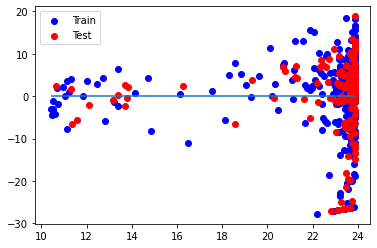

In [23]:
plot_residuals(regr, x_train,y_train, x_test, y_test)